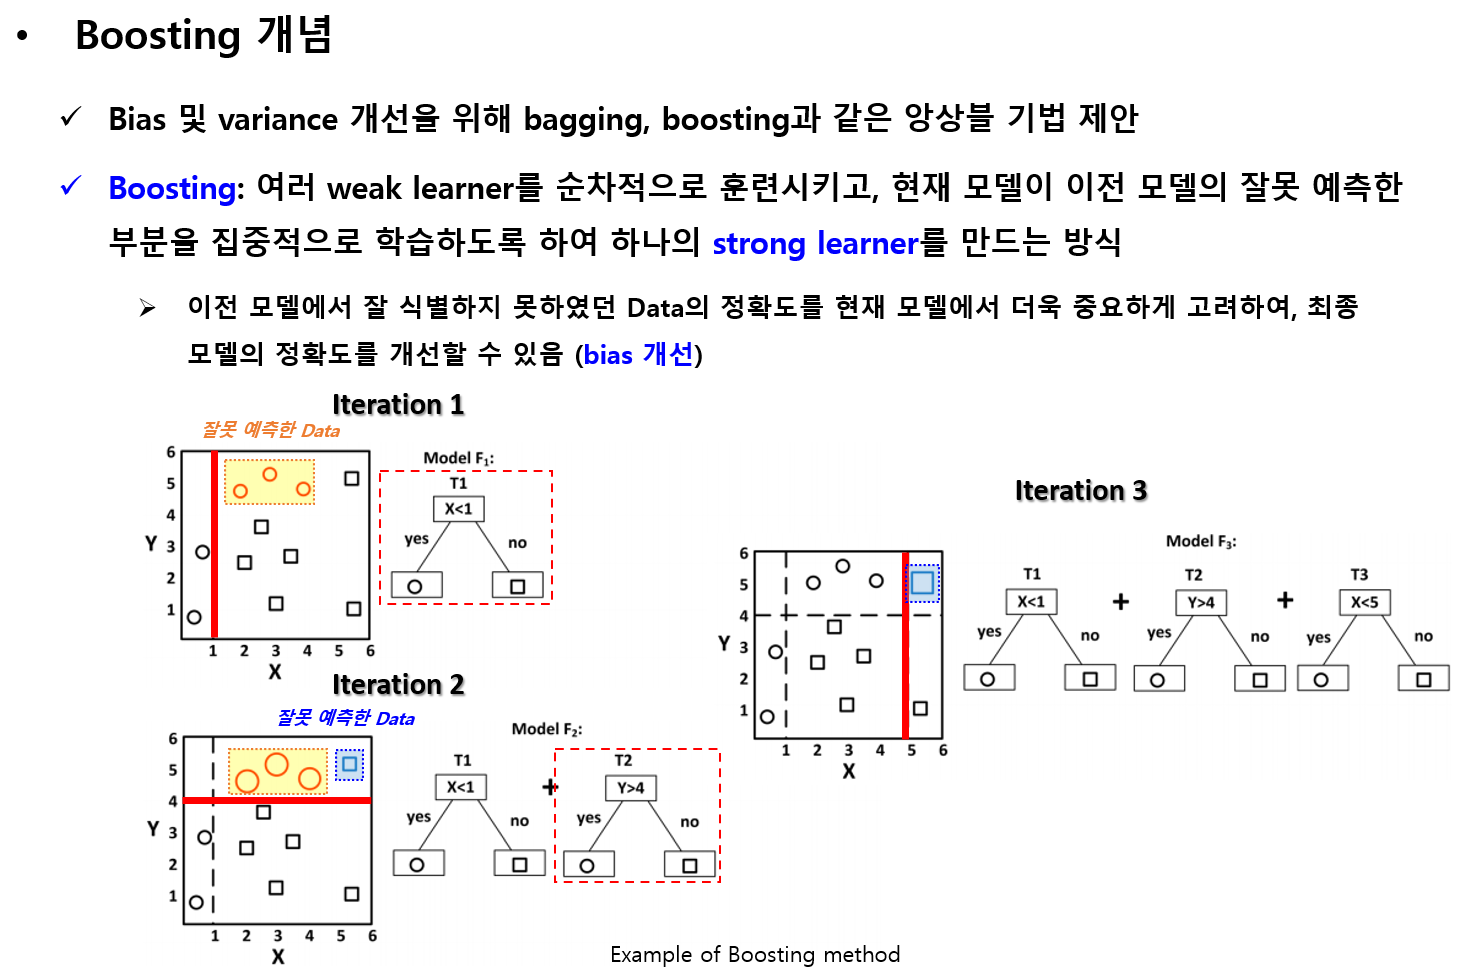

## **GBM (Classification): 가입자 이탈 여부 예측**

In [1]:
# 필요한 기본 package 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
!git clone https://github.com/yun-seon/LGES_DX-Expert_0619.git

fatal: destination path 'LGES_DX-Expert_0619' already exists and is not an empty directory.


In [3]:
'''
가입자 이탈/이탈률 dataset : 전체 19개 피처와 1개의 타겟으로 구성 (Categorical feature: State, Area_code, Int.l.Plan, VMail.Plan)
타겟명: 'Churn.' / True(1)는 이탈한 고객, False(0)는 이탈하지 않은 고객을 의미함
'''

# 데이터 불러오기
dt2 = pd.read_csv("/content/LGES_DX-Expert_0619/churn.csv")
print('dataset shape:', dt2.shape)

# 데이터 확인
dt2.head()

dataset shape: (3333, 20)


,State,Account.Length,Area.Code,Int.l.Plan,VMail.Plan,VMail.Message,Day.Mins,Day.Calls,Day.Charge,Eve.Mins,Eve.Calls,Eve.Charge,Night.Mins,Night.Calls,Night.Charge,Intl.Mins,Intl.Calls,Intl.Charge,CustServ.Calls,Churn.
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
# 데이터 타입(type) 확인
dt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account.Length  3333 non-null   int64  
 2   Area.Code       3333 non-null   int64  
 3   Int.l.Plan      3333 non-null   object 
 4   VMail.Plan      3333 non-null   object 
 5   VMail.Message   3333 non-null   int64  
 6   Day.Mins        3333 non-null   float64
 7   Day.Calls       3333 non-null   int64  
 8   Day.Charge      3333 non-null   float64
 9   Eve.Mins        3333 non-null   float64
 10  Eve.Calls       3333 non-null   int64  
 11  Eve.Charge      3333 non-null   float64
 12  Night.Mins      3333 non-null   float64
 13  Night.Calls     3333 non-null   int64  
 14  Night.Charge    3333 non-null   float64
 15  Intl.Mins       3333 non-null   float64
 16  Intl.Calls      3333 non-null   int64  
 17  Intl.Charge     3333 non-null   f

In [5]:
# 데이터 전처리

# column name 중 "."을 "_"으로 변경
dt2.columns = dt2.columns.str.replace(".","_")

# data중 Area.Code는 지역숫자로 수치적 의미를 갖지 않으므로, category 형태로 변경
'''
- category: 가능한 값의 범위가 고정적 or 한정적일 때 사용 (ex. 아침식사 여부: 0, 1)
- object: 문자열이거나 범위가 한정적이지 않을 경우 사용   (ex. 아침식사 종류: 샐러드, 소고기, 바나나, 샌드위치 등)
'''
dt2.Area_Code = dt2.Area_Code.astype("category")

print(dt2['Churn_'].value_counts())

unsatisfied_cnt = dt2[dt2['Churn_'] == "True." ].Churn_.count()
total_cnt = dt2.Churn_.count()

print('\n이탈자 비율은 {0:.3f}'.format((unsatisfied_cnt / total_cnt))) # True: 이탈

Churn_
False.    2850
True.      483
Name: count, dtype: int64

이탈자 비율은 0.145


In [6]:
# 변경된 데이터 타입(type) 확인
dt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   State           3333 non-null   object  
 1   Account_Length  3333 non-null   int64   
 2   Area_Code       3333 non-null   category
 3   Int_l_Plan      3333 non-null   object  
 4   VMail_Plan      3333 non-null   object  
 5   VMail_Message   3333 non-null   int64   
 6   Day_Mins        3333 non-null   float64 
 7   Day_Calls       3333 non-null   int64   
 8   Day_Charge      3333 non-null   float64 
 9   Eve_Mins        3333 non-null   float64 
 10  Eve_Calls       3333 non-null   int64   
 11  Eve_Charge      3333 non-null   float64 
 12  Night_Mins      3333 non-null   float64 
 13  Night_Calls     3333 non-null   int64   
 14  Night_Charge    3333 non-null   float64 
 15  Intl_Mins       3333 non-null   float64 
 16  Intl_Calls      3333 non-null   int64   
 17  Intl_Charge   

In [7]:
# 독립변수(Xs)와 종속변수(Y) 구분
X_features = dt2.iloc[:, :-1]
y_labels = dt2.iloc[:, -1]

# 타겟 변수에 대해 불만족한 고객 ('True.')을 1로, 나머지는 0으로 해서 최종적으로 binary class {1, 0}로 변경
y_labels = np.where(y_labels == "True.", 1, 0)
y_labels = pd.Series(y_labels)

print('type of labels:{0}'.format(np.unique(y_labels)))

type of labels:[0 1]


In [8]:
# object 타입을 category로 변경
for col in X_features.columns:
    if X_features[col].dtypes == "O":
        X_features[col] = X_features[col].astype('category')

# 데이터 타입(type) 확인
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   State           3333 non-null   category
 1   Account_Length  3333 non-null   int64   
 2   Area_Code       3333 non-null   category
 3   Int_l_Plan      3333 non-null   category
 4   VMail_Plan      3333 non-null   category
 5   VMail_Message   3333 non-null   int64   
 6   Day_Mins        3333 non-null   float64 
 7   Day_Calls       3333 non-null   int64   
 8   Day_Charge      3333 non-null   float64 
 9   Eve_Mins        3333 non-null   float64 
 10  Eve_Calls       3333 non-null   int64   
 11  Eve_Charge      3333 non-null   float64 
 12  Night_Mins      3333 non-null   float64 
 13  Night_Calls     3333 non-null   int64   
 14  Night_Charge    3333 non-null   float64 
 15  Intl_Mins       3333 non-null   float64 
 16  Intl_Calls      3333 non-null   int64   
 17  Intl_Charge   

In [9]:
# GBM에서 categorical feature에 대해 one-hot encoding 진행
def onehot(data, feature):

    return pd.concat([data, pd.get_dummies(data[feature], prefix=feature)], axis=1).drop([feature], axis=1)

# 다음 4가지 categorical feature에 대해 one-hot encoding을 진행 후 기존 X_feature에 결합
cate_list = ['State', 'Area_Code', 'Int_l_Plan', 'VMail_Plan']

for i in range(len(cate_list)):

    X_features = onehot(X_features, cate_list[i])

In [10]:
# 추가된 feature 확인
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 73 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   VMail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Day_Calls       3333 non-null   int64  
 4   Day_Charge      3333 non-null   float64
 5   Eve_Mins        3333 non-null   float64
 6   Eve_Calls       3333 non-null   int64  
 7   Eve_Charge      3333 non-null   float64
 8   Night_Mins      3333 non-null   float64
 9   Night_Calls     3333 non-null   int64  
 10  Night_Charge    3333 non-null   float64
 11  Intl_Mins       3333 non-null   float64
 12  Intl_Calls      3333 non-null   int64  
 13  Intl_Charge     3333 non-null   float64
 14  CustServ_Calls  3333 non-null   int64  
 15  State_AK        3333 non-null   bool   
 16  State_AL        3333 non-null   bool   
 17  State_AR        3333 non-null   b

In [11]:
# 학습 데이터와 테스트 데이터 구분
# 학습 데이터 비율: 0.8, 테스트 데이터 비율: 0.2
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()

print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print('\n학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)

print('\n테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(2666, 73), 테스트 세트 Shape:(667, 73)

학습 세트 레이블 값 분포 비율
0    0.851838
1    0.148162
Name: count, dtype: float64

테스트 세트 레이블 값 분포 비율
0    0.868066
1    0.131934
Name: count, dtype: float64


In [12]:
# GBM 모델 package 불러오기
from sklearn.ensemble import GradientBoostingClassifier

# GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time()

# 모델 생성 및 train data로 fitting (학습) 진행
gbm = GradientBoostingClassifier(loss             = 'deviance',
                                 criterion        = 'squared_error', # 개별 트리의 불순도 측도
                                 n_estimators     = 100,
                                 min_samples_leaf = 5,
                                 max_depth        = 3,
                                 learning_rate    = 1,
                                 random_state     = 0)
gbm.fit(X_train , y_train)

# GBM 실험 종료에 대한 시간 측정
gb_time = time.time() - start_time
print("GBM 수행 시간: {0:.2f} 초 ".format(gb_time))

GBM 수행 시간: 3.72 초 


In [13]:
# XGB 모델 package 불러오기
import xgboost as xgb

# GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time()

# 모델 생성 및 train data로 fitting (학습) 진행
xgb = xgb.XGBClassifier(n_estimators=100,
                        max_depth=3,
                        learning_rate=1,
                        objective='binary:logistic')

xgb.fit(X_train , y_train)

# GBM 실험 종료에 대한 시간 측정
xgb_time = time.time() - start_time
print("XGB 수행 시간: {0:.2f} 초 ".format(xgb_time))

XGB 수행 시간: 3.05 초 


In [14]:
# LGBM 모델 package 불러오기
import lightgbm as lgb

# LGBM 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time()

# 모델 생성 및 train data로 fitting (학습) 진행
lgbm = lgb.LGBMClassifier(objective ='binary',
                      boosting_type = 'gbdt',
                      num_leaves = 31,
                      learning_rate = 0.05,
                      feature_fraction = 0.9)

lgbm.fit(X_train , y_train)

# LGBM 실험 종료에 대한 시간 측정
lgbm_time = time.time() - start_time
print("LGBM 수행 시간: {0:.2f} 초 ".format(lgbm_time))

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 395, number of negative: 2271
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2504
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 73
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148162 -> initscore=-1.749090
[LightGBM] [Info] Start training from score -1.749090
LGBM 수행 시간: 0.45 초 


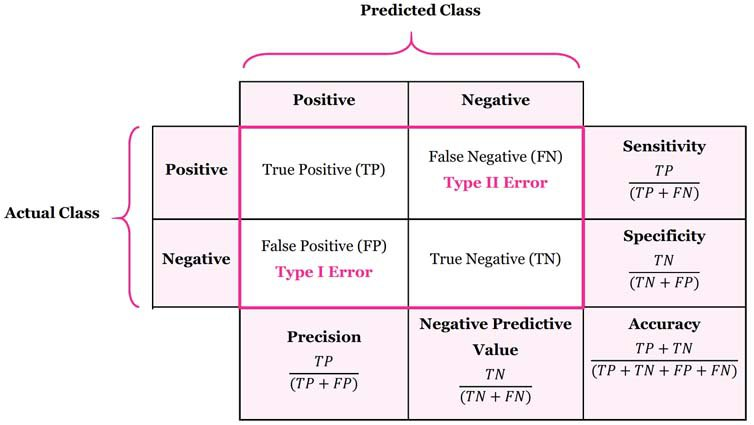

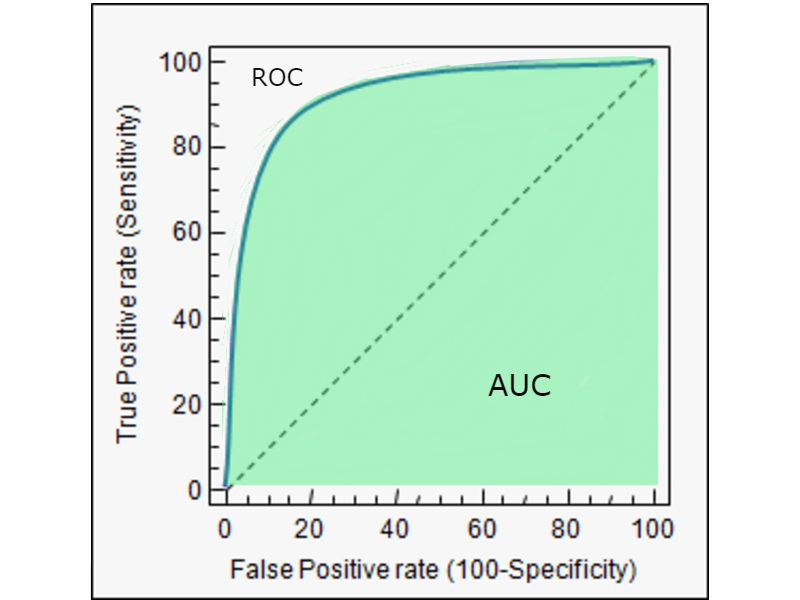

In [15]:
# 학습 완료된 GBM 모델을 통해 테스트 데이터 예측
pred_gbm = gbm.predict(X_test)

# 예측 값과 실제 값 간의 비교를 통해, 정확도(차이) 계산
accuracy = accuracy_score(y_test, pred_gbm)
print('정확도: {0:.4f}'.format(accuracy))

# 예측 값과 실제 값 간의 비교를 통해, AUC 계산
roc_score = roc_auc_score(y_test, gbm.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(roc_score))

# 각 평가지표 종합 산출
print(classification_report(y_test, pred_gbm))

정확도: 0.9340
ROC AUC: 0.8744
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       579
           1       0.76      0.74      0.75        88

    accuracy                           0.93       667
   macro avg       0.86      0.85      0.85       667
weighted avg       0.93      0.93      0.93       667



In [16]:
# 학습 완료된 XGB 모델을 통해 테스트 데이터 예측
pred_xgb = xgb.predict(X_test)

# 예측 값과 실제 값 간의 비교를 통해, 정확도(차이) 계산
accuracy = accuracy_score(y_test, pred_xgb)
print('정확도: {0:.4f}'.format(accuracy))

# 예측 값과 실제 값 간의 비교를 통해, AUC 계산
roc_score = roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(roc_score))

# 각 평가지표 종합 산출
print(classification_report(y_test, pred_xgb))

정확도: 0.9415
ROC AUC: 0.8869
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       579
           1       0.80      0.75      0.77        88

    accuracy                           0.94       667
   macro avg       0.88      0.86      0.87       667
weighted avg       0.94      0.94      0.94       667



In [17]:
# 학습 완료된 LGBM 모델을 통해 테스트 데이터 예측
pred_lgbm = lgbm.predict(X_test)

# 예측 값과 실제 값 간의 비교를 통해, 정확도(차이) 계산
accuracy = accuracy_score(y_test, pred_lgbm)
print('정확도: {0:.4f}'.format(accuracy))

# 예측 값과 실제 값 간의 비교를 통해, AUC 계산
roc_score = roc_auc_score(y_test, lgbm.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(roc_score))

# 각 평가지표 종합 산출
print(classification_report(y_test, pred_lgbm))

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
정확도: 0.9595
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
ROC AUC: 0.9073
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       579
           1       0.88      0.81      0.84        88

    accuracy                           0.96       667
   macro avg       0.92      0.89      0.91       667
weighted avg       0.96      0.96      0.96       667



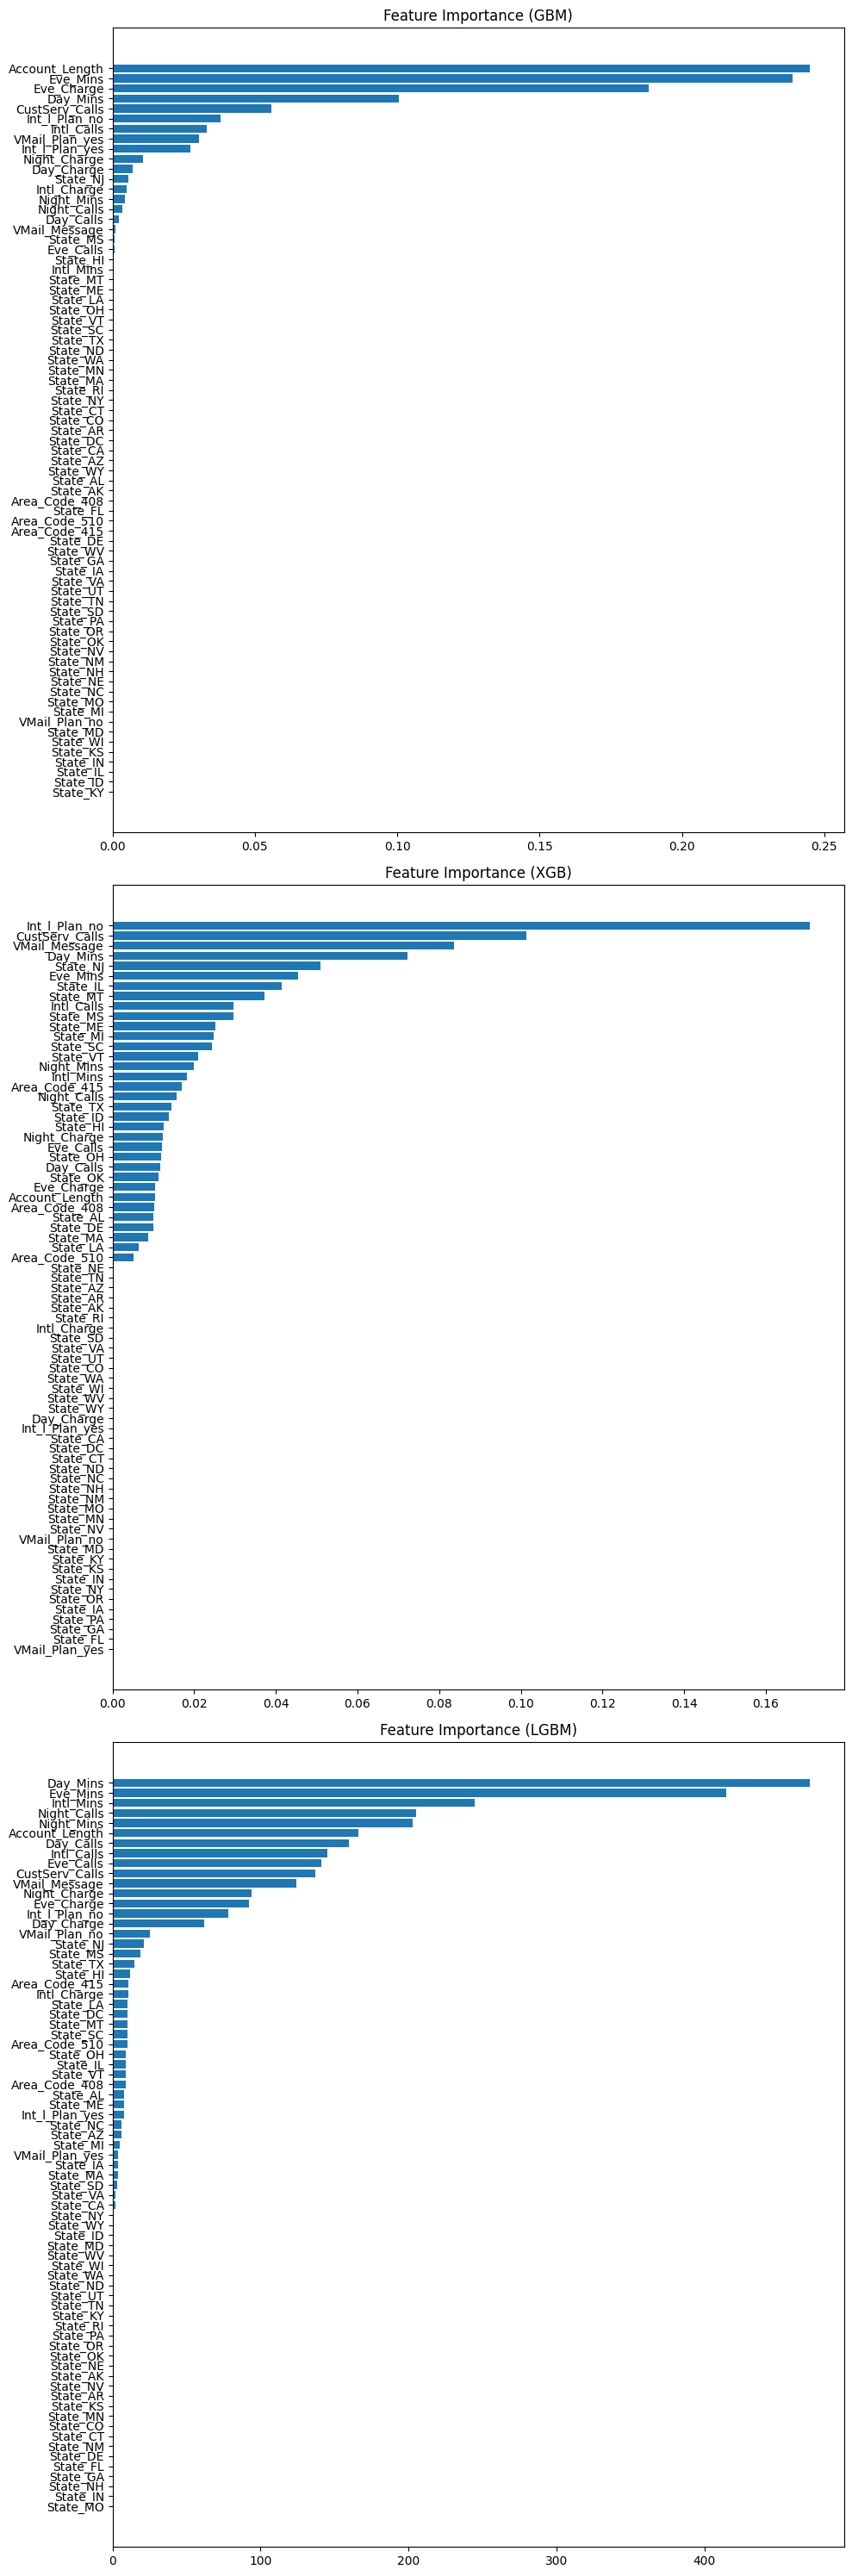

In [18]:
# feature importance 산출 / feature importance 값이 높을수록 feature 중요도가 높다고 해석할 수 있음
plt.figure(figsize=(10, 30))

# 첫 번째 서브플롯
plt.subplot(3, 1, 1)
# feature importance 산출 / feature importance 값이 높을수록 feature 중요도가 높다고 해석할 수 있음
feature_importance = gbm.feature_importances_
# feature_importance를 높은 순서로 정렬
sorted_idx = np.argsort(feature_importance)
# 변수 중요도 plot의 X축 길이를 선정하기 위한 설정
pos = np.arange(sorted_idx.shape[0]) + .5
# Bar chart 시각화
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_features.columns)[sorted_idx])
plt.title('Feature Importance (GBM)')

# 두 번째 서브플롯
plt.subplot(3, 1, 2)
# feature importance 산출 / feature importance 값이 높을수록 feature 중요도가 높다고 해석할 수 있음
feature_importance = xgb.feature_importances_
# feature_importance를 높은 순서로 정렬
sorted_idx = np.argsort(feature_importance)
# 변수 중요도 plot의 X축 길이를 선정하기 위한 설정
pos = np.arange(sorted_idx.shape[0]) + .5
# Bar chart 시각화
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_features.columns)[sorted_idx])
plt.title('Feature Importance (XGB)')

# 세 번째 서브플롯
plt.subplot(3, 1, 3)
# feature importance 산출 / feature importance 값이 높을수록 feature 중요도가 높다고 해석할 수 있음
feature_importance = lgbm.feature_importances_
# feature_importance를 높은 순서로 정렬
sorted_idx = np.argsort(feature_importance)
# 변수 중요도 plot의 X축 길이를 선정하기 위한 설정
pos = np.arange(sorted_idx.shape[0]) + .5
# Bar chart 시각화
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_features.columns)[sorted_idx])
plt.title('Feature Importance (LGBM)')

# 플롯 표시
plt.tight_layout()
plt.show()

In [19]:
# 변수 중요도 (수치 확인)
for i, col in enumerate(X_features.iloc[:, :-1].columns):
    print(f'{col} 중요도 : {lgbm.feature_importances_[i]}')

print("\n", lgbm.get_params()) # GradientBoostingClassifier 클래스 인자 설정 정보

Account_Length 중요도 : 166
VMail_Message 중요도 : 124
Day_Mins 중요도 : 471
Day_Calls 중요도 : 160
Day_Charge 중요도 : 62
Eve_Mins 중요도 : 415
Eve_Calls 중요도 : 141
Eve_Charge 중요도 : 92
Night_Mins 중요도 : 203
Night_Calls 중요도 : 205
Night_Charge 중요도 : 94
Intl_Mins 중요도 : 245
Intl_Calls 중요도 : 145
Intl_Charge 중요도 : 11
CustServ_Calls 중요도 : 137
State_AK 중요도 : 0
State_AL 중요도 : 8
State_AR 중요도 : 0
State_AZ 중요도 : 6
State_CA 중요도 : 2
State_CO 중요도 : 0
State_CT 중요도 : 0
State_DC 중요도 : 10
State_DE 중요도 : 0
State_FL 중요도 : 0
State_GA 중요도 : 0
State_HI 중요도 : 12
State_IA 중요도 : 4
State_ID 중요도 : 0
State_IL 중요도 : 9
State_IN 중요도 : 0
State_KS 중요도 : 0
State_KY 중요도 : 0
State_LA 중요도 : 10
State_MA 중요도 : 4
State_MD 중요도 : 0
State_ME 중요도 : 8
State_MI 중요도 : 5
State_MN 중요도 : 0
State_MO 중요도 : 0
State_MS 중요도 : 19
State_MT 중요도 : 10
State_NC 중요도 : 6
State_ND 중요도 : 0
State_NE 중요도 : 0
State_NH 중요도 : 0
State_NJ 중요도 : 21
State_NM 중요도 : 0
State_NV 중요도 : 0
State_NY 중요도 : 1
State_OH 중요도 : 9
State_OK 중요도 : 0
State_OR 중요도 : 0
State_PA 중요도 : 0
State_RI 중요도

> GridSearch를 통한 파라미터 최적화

In [20]:
# 최적 hyper parameter를 찾기 위해 GridSearchCV 실행
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 300, 500],
    'learning_rate' : [ 0.05, 0.1]
}

gb_grid_cv = GridSearchCV(gbm , param_grid=params , cv=2 ,verbose=1, n_jobs=-1)
gb_grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', gb_grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(gb_grid_cv.best_score_))

Fitting 2 folds for each of 6 candidates, totalling 12 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 100}
최고 예측 정확도: 0.9426


In [21]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 예측 수행
gb_pred = gb_grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

gb_grid_cv_roc_score = roc_auc_score(y_test, gb_grid_cv.predict_proba(X_test)[:,1],average='macro')
print('GBM ROC AUC: {0:.4f}'.format(gb_grid_cv_roc_score))

GBM 정확도: 0.9595
GBM ROC AUC: 0.9149


> 개별 Tree 시각화

In [22]:
# GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time()

# 모델 생성 및 train data로 fitting (학습) 진행
clf = GradientBoostingClassifier(loss             = 'deviance',
                                 criterion        = 'squared_error', # 개별 트리의 불순도 측도
                                 n_estimators     = 5,
                                 min_samples_leaf = 5,
                                 max_depth        = 3,
                                 learning_rate    = 1,
                                 random_state     = 0)
clf.fit(X_train , y_train)

# GBM 실험 종료에 대한 시간 측정
gb_time = time.time() - start_time
print("GBM 수행 시간: {0:.2f} 초 ".format(gb_time))

GBM 수행 시간: 0.07 초 


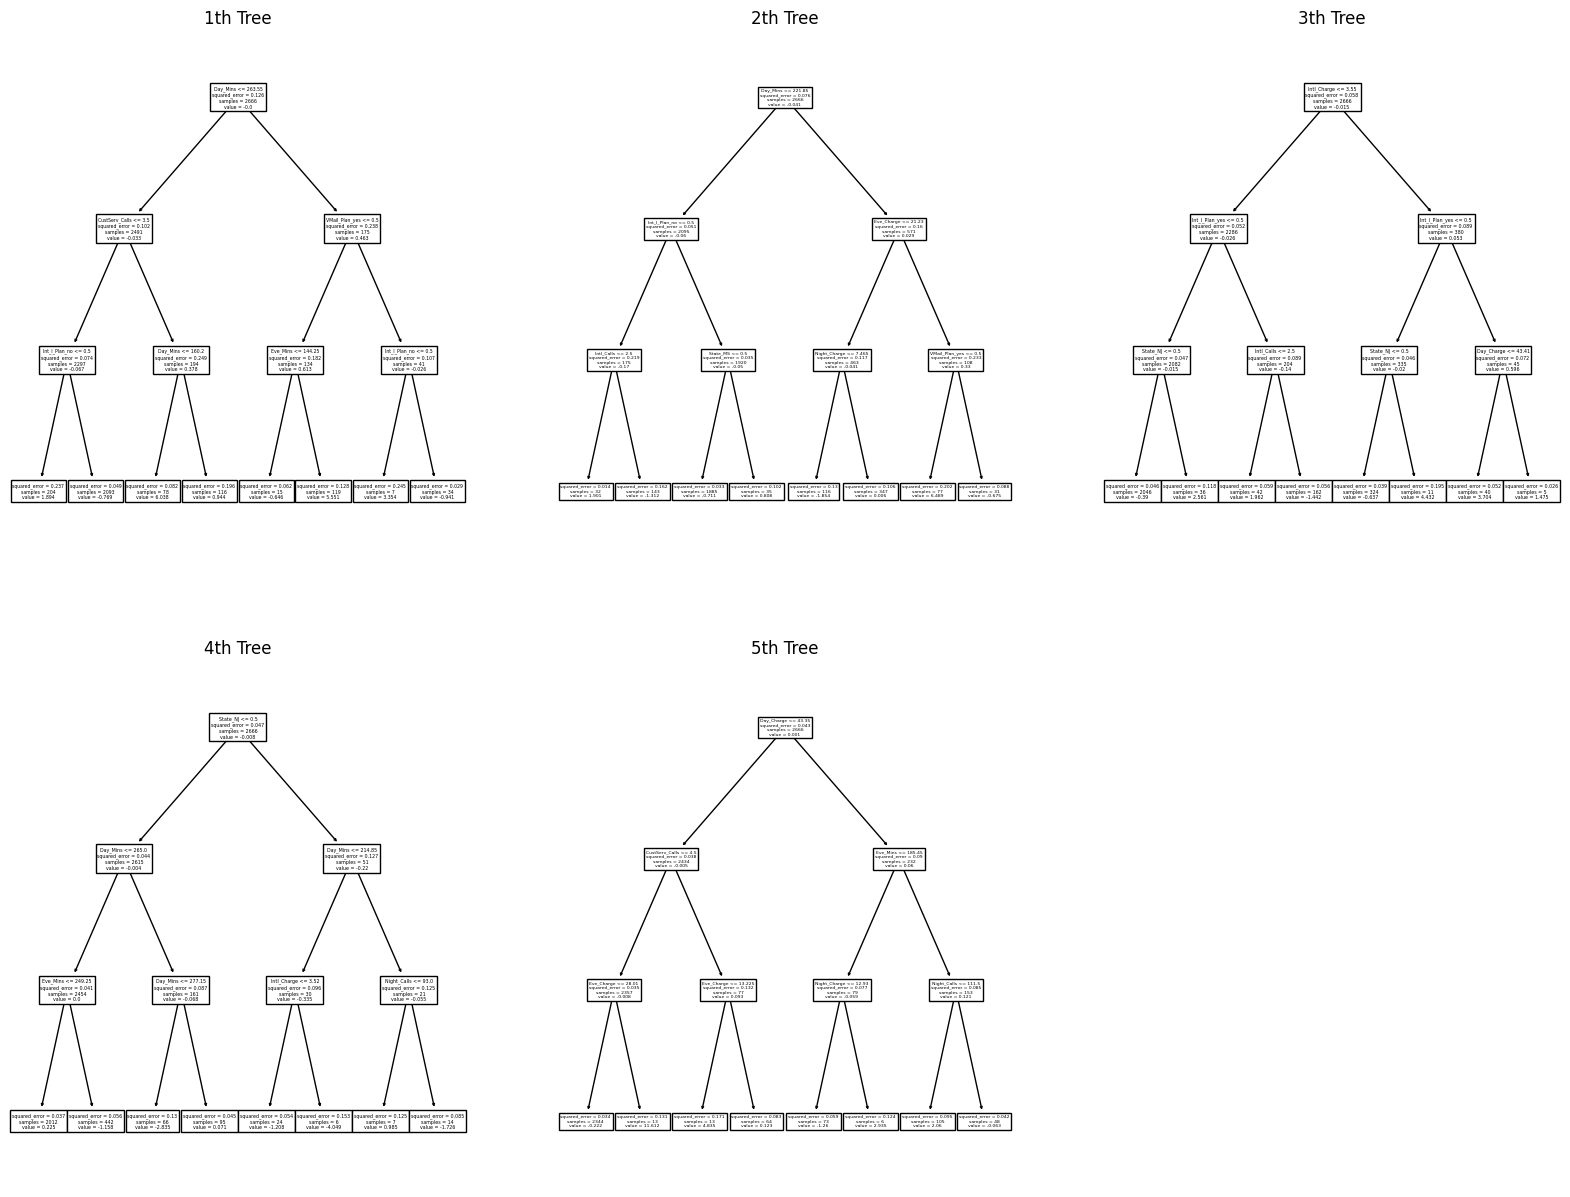

In [23]:
from sklearn.tree import plot_tree

n_estimator = len(clf.estimators_)
fig = plt.figure(figsize=(20, 15), facecolor='white')

row_num=2
col_num=3
for i in range(n_estimator):
    ax = fig.add_subplot(row_num, col_num, i+1)
    plot_tree(clf.estimators_[i][0],
              feature_names=X_features.columns, ## 박스에 변수 이름 표시
              ax=ax
             )
    ax.set_title(f'{i+1}th Tree')
plt.show()